In [ ]:
# GRIP- April2022
# The Spark Foundation-Data science & Business Analytics Intern
# Aauthor - Sumyuktha.k
# Email: atturu05@gmail.com
# Task 8 : Timeline Analysis : covid 19

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Surpress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing the dataset

covid = pd.read_csv('G:\dataset\owid-covid-data.csv')
covid.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [4]:
# Checking the number of rows and columns in the dataframe
covid.shape

(188788, 67)

In [5]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188788 entries, 0 to 188787
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    188788 non-null  object 
 1   continent                                   177805 non-null  object 
 2   location                                    188788 non-null  object 
 3   date                                        188788 non-null  object 
 4   total_cases                                 181315 non-null  float64
 5   new_cases                                   181041 non-null  float64
 6   new_cases_smoothed                          179867 non-null  float64
 7   total_deaths                                162915 non-null  float64
 8   new_deaths                                  162903 non-null  float64
 9   new_deaths_smoothed                         161741 non-null  float64
 

In [6]:
# Changing the data types for dates
covid['date'] = pd.to_datetime(covid['date'])
covid['date'].dtypes

dtype('<M8[ns]')

In [7]:
# Checking the numeric columns in the dataframe
covid.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.813150e+05,1.810410e+05,1.798670e+05,1.629150e+05,162903.000000,161741.000000,180478.000000,180204.000000,179035.000000,162091.000000,...,117662.000000,116049.000000,76432.000000,138033.000000,176548.000000,151542.000000,6.525000e+03,6525.000000,6525.000000,6525.000000
mean,3.205318e+06,1.237759e+04,1.242070e+04,6.397046e+04,159.846068,160.842333,40014.270235,185.506759,185.166371,579.424221,...,10.644806,32.790847,50.932790,3.068754,73.650321,0.725252,4.078743e+04,9.766654,15.598670,1114.211895
std,2.010777e+07,8.762452e+04,8.606680e+04,3.336055e+05,795.725588,779.181819,74398.863027,947.798132,610.380721,864.212247,...,10.581987,13.528643,31.858323,2.519789,7.450004,0.149735,1.132332e+05,16.036976,28.984741,1561.732319
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3.772610e+04,-28.450000,-95.920000,-1826.595723
25%,2.611000e+03,0.000000e+00,6.714000e+00,9.300000e+01,0.000000,0.143000,765.817500,0.000000,1.516000,22.733500,...,1.900000,21.600000,20.859000,1.300000,69.500000,0.602000,-1.460000e+01,-0.170000,-0.300000,-7.321200
50%,3.448400e+04,7.200000e+01,1.020000e+02,9.070000e+02,1.000000,2.143000,6174.410000,10.436500,19.123000,161.669000,...,6.300000,31.400000,49.839000,2.400000,75.050000,0.743000,4.237200e+03,6.560000,7.440000,569.657043
75%,3.705155e+05,1.037000e+03,1.146857e+03,8.325000e+03,18.000000,19.571000,49829.359750,102.153000,128.218000,833.791500,...,19.300000,41.300000,83.241000,4.000000,79.070000,0.845000,2.783340e+04,14.680000,21.880000,1784.551578
max,5.260912e+08,4.079811e+06,3.437207e+06,6.278676e+06,18151.000000,14795.286000,706541.904000,208049.887000,37617.428000,6388.481000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,1.213593e+06,111.010000,375.000000,9725.192865


In [8]:
# Surpressing the scientific notation for better reading
covid.describe().T.apply(lambda s: s.apply('{0:.5f}'.format))

,count,mean,std,min,25%,50%,75%,max
total_cases,181315.00000,3205317.70632,20107771.00756,1.00000,2611.00000,34484.00000,370515.50000,526091236.00000
new_cases,181041.00000,12377.58538,87624.52462,0.00000,0.00000,72.00000,1037.00000,4079811.00000
new_cases_smoothed,179867.00000,12420.69851,86066.80216,0.00000,6.71400,102.00000,1146.85700,3437207.00000
total_deaths,162915.00000,63970.46041,333605.50946,1.00000,93.00000,907.00000,8325.00000,6278676.00000
new_deaths,162903.00000,159.84607,795.72559,0.00000,0.00000,1.00000,18.00000,18151.00000
...,...,...,...,...,...,...,...,...
human_development_index,151542.00000,0.72525,0.14974,0.39400,0.60200,0.74300,0.84500,0.95700
excess_mortality_cumulative_absolute,6525.00000,40787.42725,113233.18224,-37726.10000,-14.60000,4237.20000,27833.40000,1213593.30000
excess_mortality_cumulative,6525.00000,9.76665,16.03698,-28.45000,-0.17000,6.56000,14.68000,111.01000
excess_mortality,6525.00000,15.59867,28.98474,-95.92000,-0.30000,7.44000,21.88000,375.00000


In [9]:
# Data provided in the dataset are from 01-01-2020 to 07-05-2022
covid.date.min(), covid.date.max()

(Timestamp('2020-01-01 00:00:00'), Timestamp('2022-05-23 00:00:00'))

In [10]:
drop_col = ['icu_patients','icu_patients_per_million','hosp_patients','hosp_patients_per_million','weekly_icu_admissions',
            'weekly_icu_admissions_per_million','weekly_hosp_admissions','weekly_hosp_admissions_per_million',
            'human_development_index','excess_mortality_cumulative_absolute','excess_mortality_cumulative','excess_mortality',
            'excess_mortality_cumulative_per_million','handwashing_facilities',
            'reproduction_rate','extreme_poverty']

covid.drop(columns=drop_col,axis=1,inplace=True)

In [11]:
covid.shape

(188788, 51)

In [12]:
# Checking the null values present in the dataset
covid.isnull().sum()

iso_code                                           0
continent                                      10983
location                                           0
date                                               0
total_cases                                     7473
new_cases                                       7747
new_cases_smoothed                              8921
total_deaths                                   25873
new_deaths                                     25885
new_deaths_smoothed                            27047
total_cases_per_million                         8310
new_cases_per_million                           8584
new_cases_smoothed_per_million                  9753
total_deaths_per_million                       26697
new_deaths_per_million                         26709
new_deaths_smoothed_per_million                27866
total_tests                                   111937
new_tests                                     114988
total_tests_per_thousand                      

In [13]:
# Percentage of the Null values
null_percentage =round(covid.isna().sum()/len(covid)*100,2)
null_percentage.sort_values(ascending=False).head(30)

total_boosters_per_hundred                    87.55
total_boosters                                87.55
new_vaccinations                              77.76
people_fully_vaccinated                       75.46
people_fully_vaccinated_per_hundred           75.46
people_vaccinated                             74.11
people_vaccinated_per_hundred                 74.11
total_vaccinations                            72.81
total_vaccinations_per_hundred                72.81
new_tests                                     60.91
new_tests_per_thousand                        60.91
total_tests                                   59.29
total_tests_per_thousand                      59.29
tests_per_case                                52.26
positive_rate                                 51.45
new_tests_smoothed                            47.35
new_tests_smoothed_per_thousand               47.35
new_people_vaccinated_smoothed                46.97
new_people_vaccinated_smoothed_per_hundred    46.97
new_vaccinat

In [14]:
# Checking Duplicates value
covid.duplicated().sum()

0

In [15]:
# Analysing the unique value
covid.nunique().sort_values()

tests_units                                        4
continent                                          6
hospital_beds_per_thousand                       102
female_smokers                                   112
male_smokers                                     127
median_age                                       139
diabetes_prevalence                              150
stringency_index                                 179
aged_70_older                                    191
aged_65_older                                    192
cardiovasc_death_rate                            195
gdp_per_capita                                   196
life_expectancy                                  213
population_density                               213
population                                       242
iso_code                                         244
location                                         244
date                                             874
new_people_vaccinated_smoothed_per_hundred    

In [16]:
# Categorical Columns
covid_categorical = covid.select_dtypes(exclude=['float64', 'int64', 'datetime64'])
covid_categorical.columns

Index(['iso_code', 'continent', 'location', 'tests_units'], dtype='object')

Numerical Data

In [17]:
# Numerical Columns
covid_numerical = covid.select_dtypes(exclude=['object','datetime64'])
covid_numerical.columns

Index(['total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths',
       'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
       'new_vaccinations_smoothed_per_million',
       'new_people_vaccinated_smoothed',
       'new_people_vaccinated_smoothed_per_hundred', 'stringency_index',
       'population', 'populat

In [18]:
covid_numerical.corr()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy
total_cases,1.000000,0.766432,0.791319,0.947471,0.600137,0.622258,0.101182,0.021388,0.034659,0.123196,...,0.034108,0.032937,0.030765,0.013094,-0.037520,0.006596,-0.000082,-0.004849,-0.000622,0.015508
new_cases,0.766432,1.000000,0.977724,0.736779,0.656136,0.646037,0.078712,0.070241,0.094441,0.086018,...,0.039815,0.040152,0.039046,0.017249,-0.040577,0.001784,0.005579,0.000811,0.012922,0.021017
new_cases_smoothed,0.791319,0.977724,1.000000,0.754415,0.649285,0.662727,0.082614,0.061780,0.096689,0.088692,...,0.040452,0.040792,0.039637,0.017472,-0.041226,0.001870,0.005600,0.000879,0.013095,0.021317
total_deaths,0.947471,0.736779,0.754415,1.000000,0.719472,0.743434,0.058011,0.008060,0.011075,0.137813,...,0.031633,0.027104,0.024546,0.005489,-0.038073,0.015164,-0.007178,-0.002877,-0.007614,0.015798
new_deaths,0.600137,0.656136,0.649285,0.719472,1.000000,0.975201,-0.005263,0.008952,0.007987,0.054273,...,0.035693,0.030450,0.027557,0.005783,-0.035854,0.016160,-0.006606,0.003904,-0.002762,0.016068
new_deaths_smoothed,0.622258,0.646037,0.662727,0.743434,0.975201,1.000000,-0.004586,0.004610,0.007209,0.056863,...,0.036546,0.031180,0.028211,0.005902,-0.036668,0.016607,-0.006725,0.004076,-0.002773,0.016449
total_cases_per_million,0.101182,0.078712,0.082614,0.058011,-0.005263,-0.004586,1.000000,0.310378,0.495449,0.642842,...,0.374447,0.356051,0.353849,0.273381,-0.180586,0.036213,0.347471,0.064253,0.212270,0.328127
new_cases_per_million,0.021388,0.070241,0.061780,0.008060,0.008952,0.004610,0.310378,1.000000,0.671208,0.188261,...,0.219406,0.218485,0.218079,0.164573,-0.122641,0.016813,0.188899,0.023738,0.133203,0.132681
new_cases_smoothed_per_million,0.034659,0.094441,0.096689,0.011075,0.007987,0.007209,0.495449,0.671208,1.000000,0.252482,...,0.258379,0.257408,0.257011,0.200865,-0.146950,0.020718,0.224744,0.028722,0.158928,0.206006
total_deaths_per_million,0.123196,0.086018,0.088692,0.137813,0.054273,0.056863,0.642842,0.188261,0.252482,1.000000,...,0.392128,0.391828,0.390331,0.151717,-0.127531,0.025395,0.406009,0.098431,0.213445,0.326402


In [19]:
# Checking the correlation between variables
covid_numerical.corr().unstack().sort_values(ascending=False).drop_duplicates()

life_expectancy                             life_expectancy               1.000000
aged_70_older                               aged_65_older                 0.994089
total_vaccinations                          people_vaccinated             0.993614
                                            people_fully_vaccinated       0.992721
people_vaccinated                           people_fully_vaccinated       0.985996
                                                                            ...   
cardiovasc_death_rate                       median_age                   -0.338842
aged_70_older                               cardiovasc_death_rate        -0.353216
new_people_vaccinated_smoothed_per_hundred  total_boosters_per_hundred   -0.441413
cardiovasc_death_rate                       life_expectancy              -0.471393
gdp_per_capita                              cardiovasc_death_rate        -0.476071
Length: 1036, dtype: float64

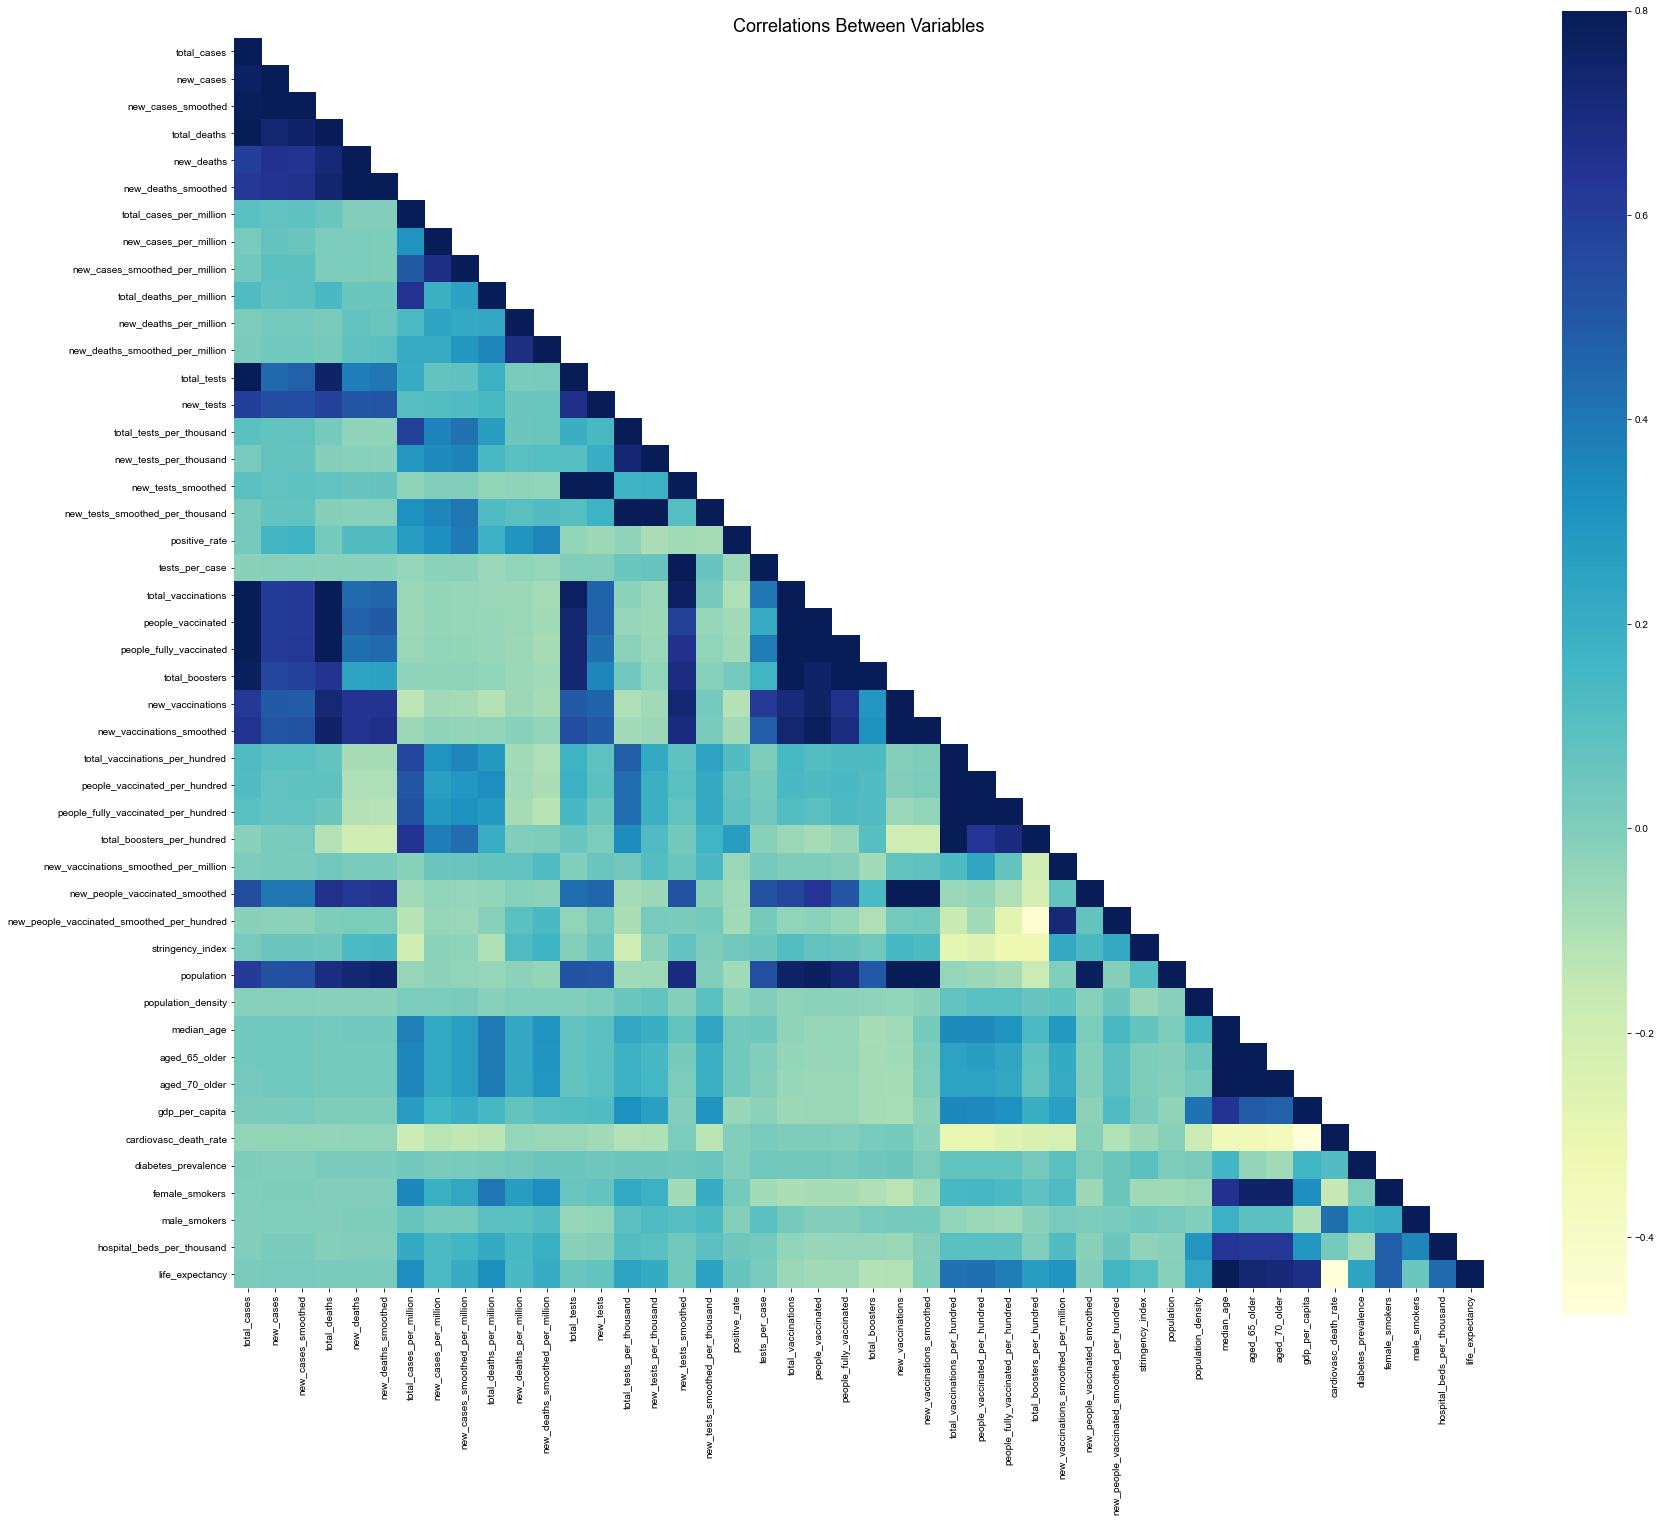

In [20]:
# Plotting heatmap to check on the correlation coefficients
plt.figure(figsize=(28,24))
mask = np.array(covid_numerical.corr())
mask[np.tril_indices_from(mask)] = False
sns.heatmap(covid_numerical.corr(), mask = mask, vmax = .8, square =  True, annot=False, cmap='YlGnBu', fmt=".2f")

sns.set_style('whitegrid')
sns.set_context('talk')
plt.title('Correlations Between Variables')
plt.show()

In [21]:
# Total columns of the numerical columns
len(covid_numerical.columns)

46

In [22]:
# Data types of the numerical columns
covid_numerical.dtypes

total_cases                                   float64
new_cases                                     float64
new_cases_smoothed                            float64
total_deaths                                  float64
new_deaths                                    float64
new_deaths_smoothed                           float64
total_cases_per_million                       float64
new_cases_per_million                         float64
new_cases_smoothed_per_million                float64
total_deaths_per_million                      float64
new_deaths_per_million                        float64
new_deaths_smoothed_per_million               float64
total_tests                                   float64
new_tests                                     float64
total_tests_per_thousand                      float64
new_tests_per_thousand                        float64
new_tests_smoothed                            float64
new_tests_smoothed_per_thousand               float64
positive_rate               

Categorical data

In [23]:
# List of columns for the categorical
covid_categorical.columns

Index(['iso_code', 'continent', 'location', 'tests_units'], dtype='object')

Data is cleaned and is ready for Analysis

In [24]:
df1 = covid[["date", "total_cases", "new_cases", "total_deaths", "new_tests", "total_tests"]]
df1.head()

,date,total_cases,new_cases,total_deaths,new_tests,total_tests
0,2020-02-24,5.0,5.0,NaN,NaN,NaN
1,2020-02-25,5.0,0.0,NaN,NaN,NaN
2,2020-02-26,5.0,0.0,NaN,NaN,NaN
3,2020-02-27,5.0,0.0,NaN,NaN,NaN
4,2020-02-28,5.0,0.0,NaN,NaN,NaN


In [25]:
df1.date = pd.to_datetime(covid.date)
df1.set_index('date', inplace = True)
df1.head()
df1.tail()

,total_cases,new_cases,total_deaths,new_tests,total_tests
date,,,,,
2022-05-19,250206.0,199.0,5487.0,NaN,NaN
2022-05-20,250469.0,263.0,5489.0,NaN,NaN
2022-05-21,250469.0,0.0,5489.0,NaN,NaN
2022-05-22,250642.0,173.0,5494.0,NaN,NaN
2022-05-23,250702.0,60.0,5495.0,NaN,NaN


Text(0.5, 0, 'Month')

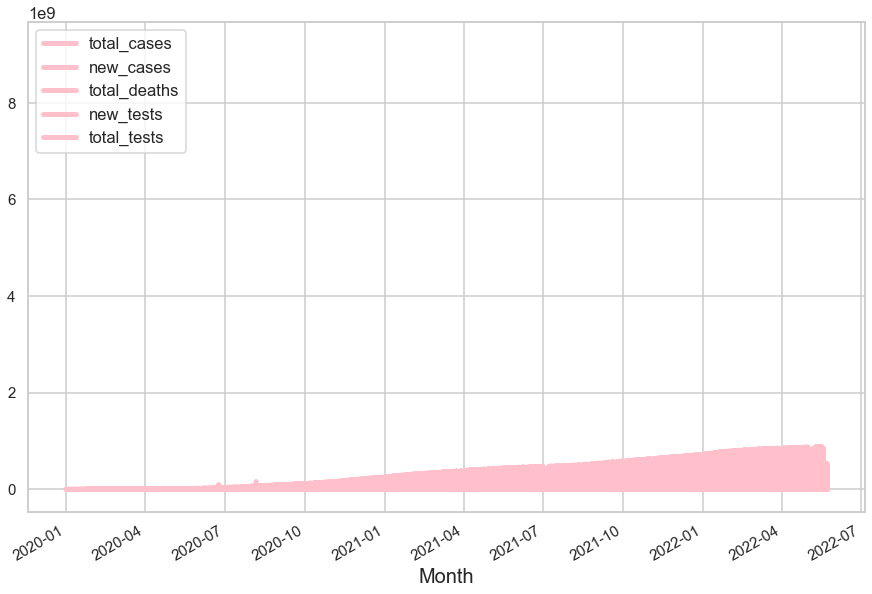

In [52]:
# Covid cases based onmonth wise
df1.plot(figsize = (15 , 10), linewidth = 5, fontsize = 15,color ='pink')
plt.xlabel('Month', fontsize = 20)


Text(0.5, 0, 'Month')

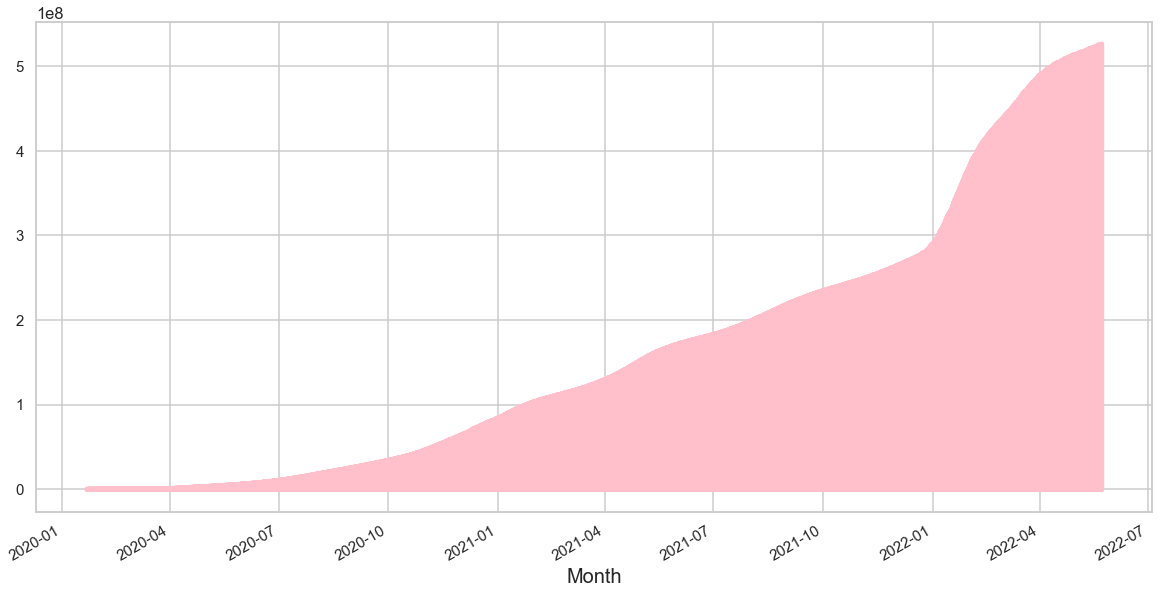

In [46]:
df1.total_cases.plot(figsize = (20 , 10), linewidth = 5, fontsize = 15,color ='pink')
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

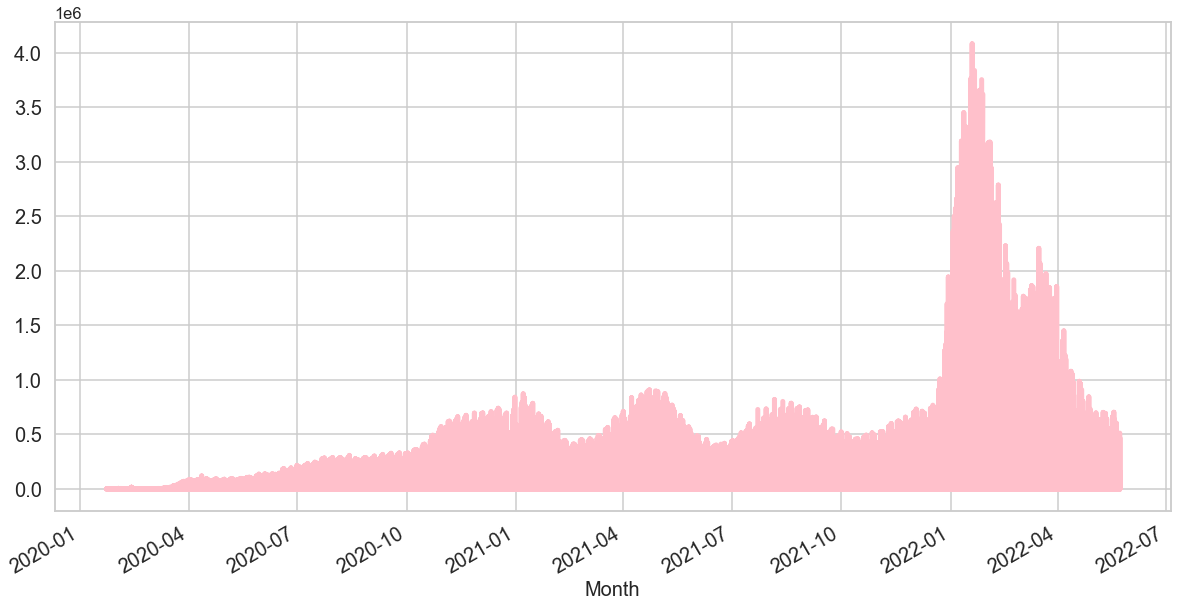

In [45]:
df1.new_cases.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20,color ='pink')
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

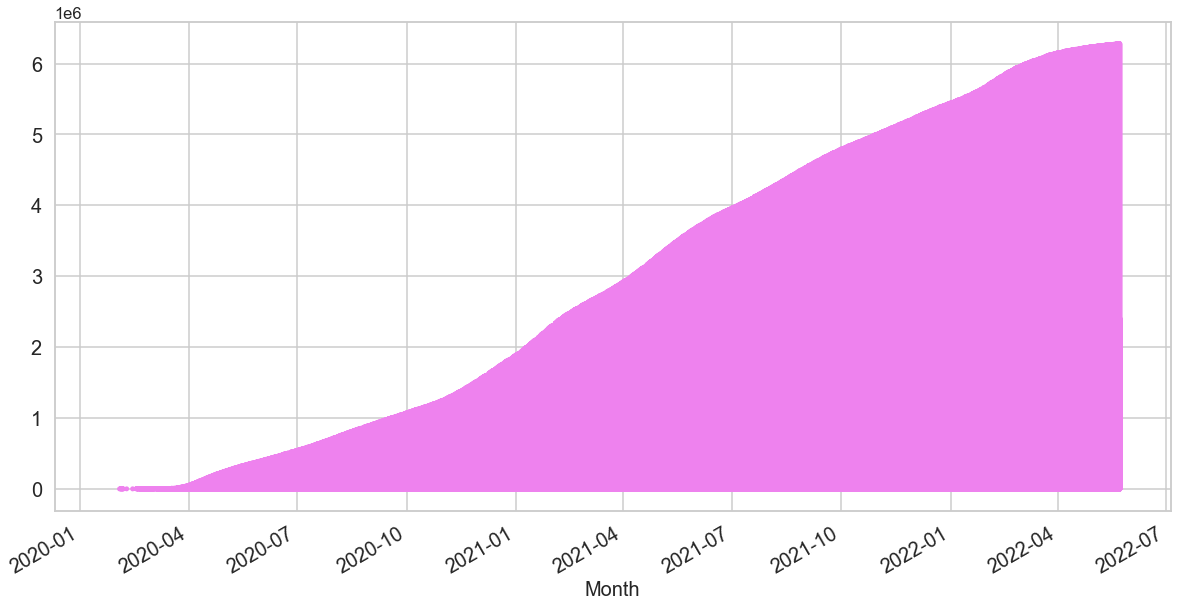

In [50]:
df1.total_deaths.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20,color ='violet')
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

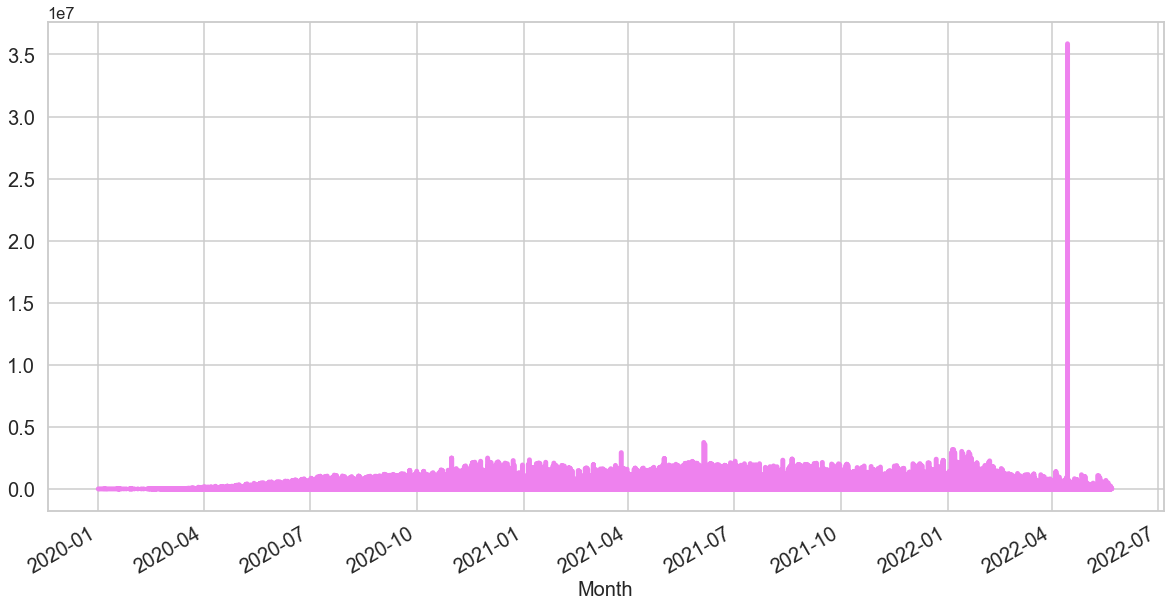

In [49]:
df1.new_tests.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20,color ='violet')
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

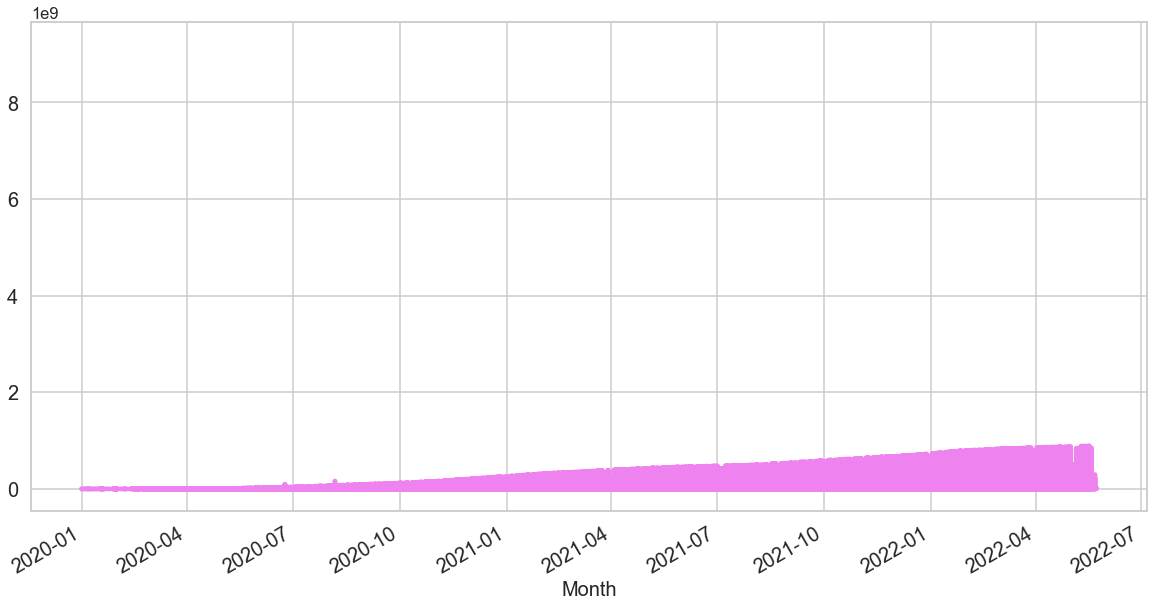

In [51]:
df1.total_tests.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20,color ='violet')
plt.xlabel('Month', fontsize = 20)

Analysis of Time Series Data

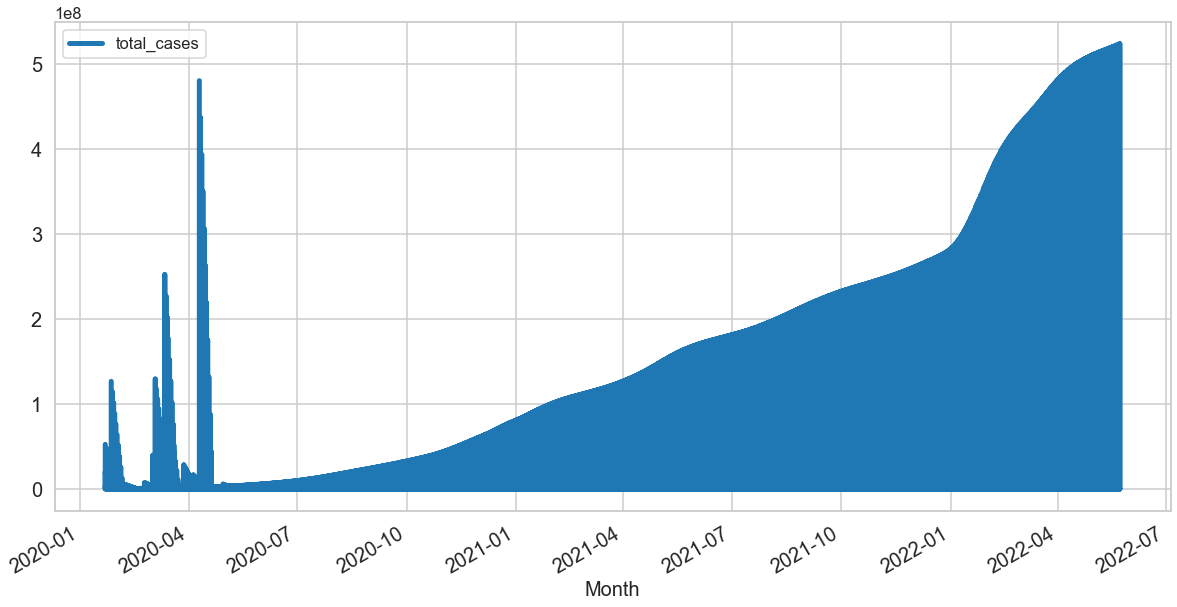

In [35]:
total_cases = df1[['total_cases']]
total_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

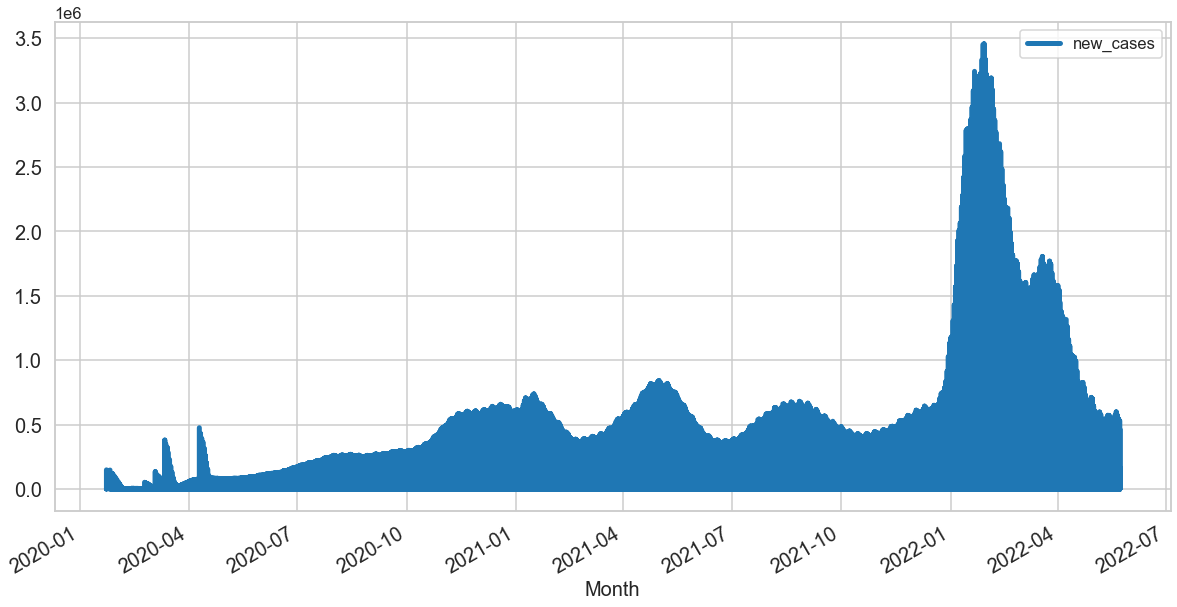

In [36]:
new_cases = df1[['new_cases']]
new_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

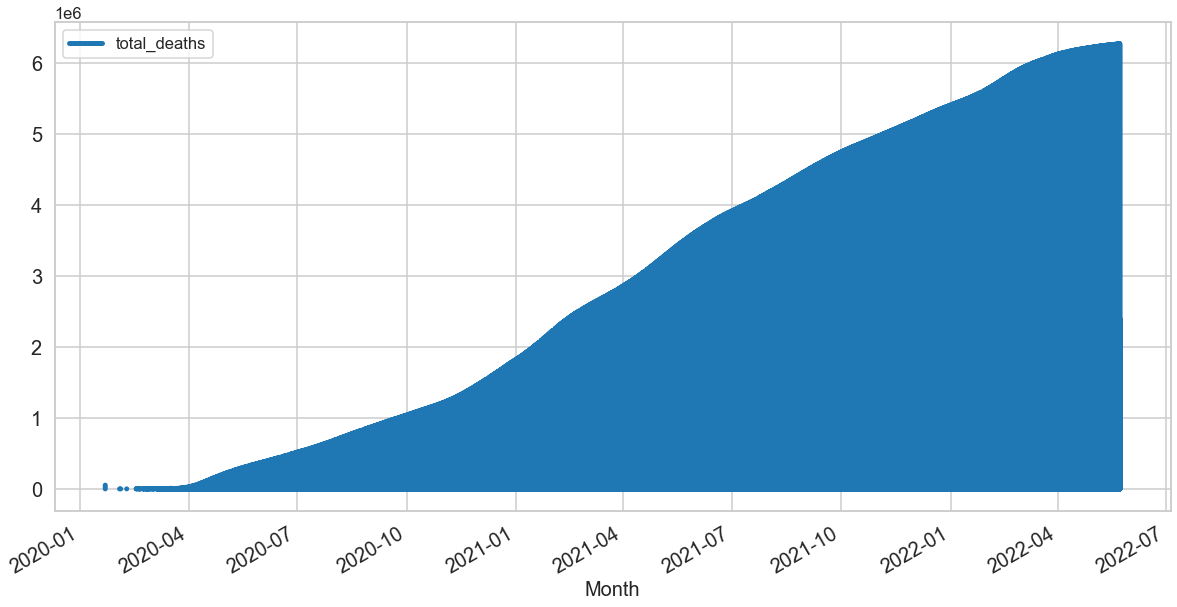

In [37]:
total_deaths = df1[['total_deaths']]
total_deaths.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

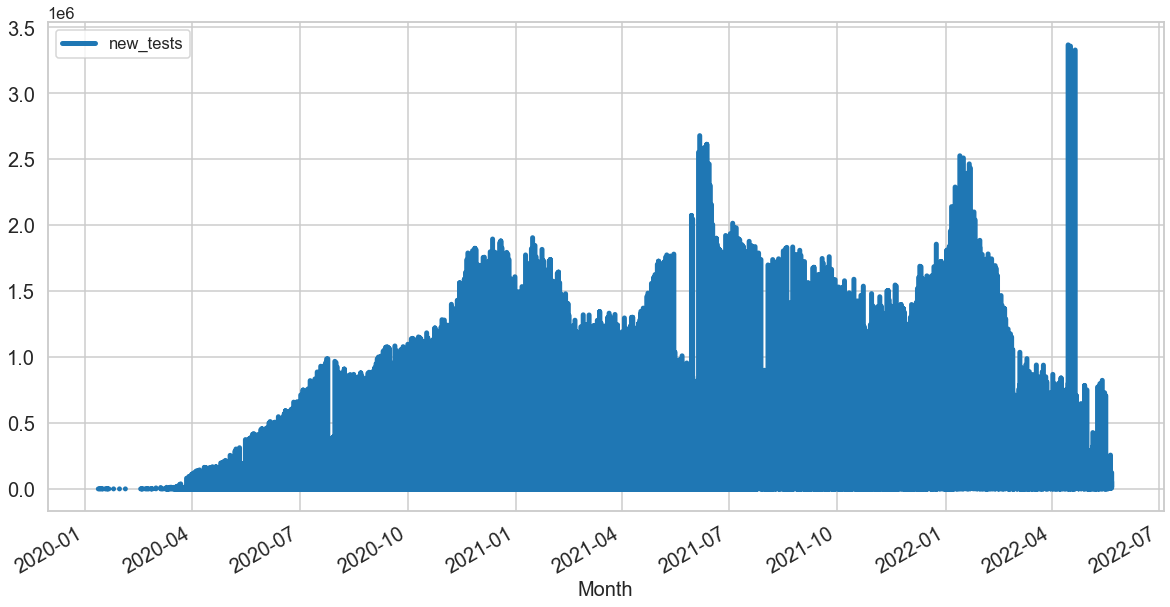

In [38]:
new_tests = df1[['new_tests']]
new_tests.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

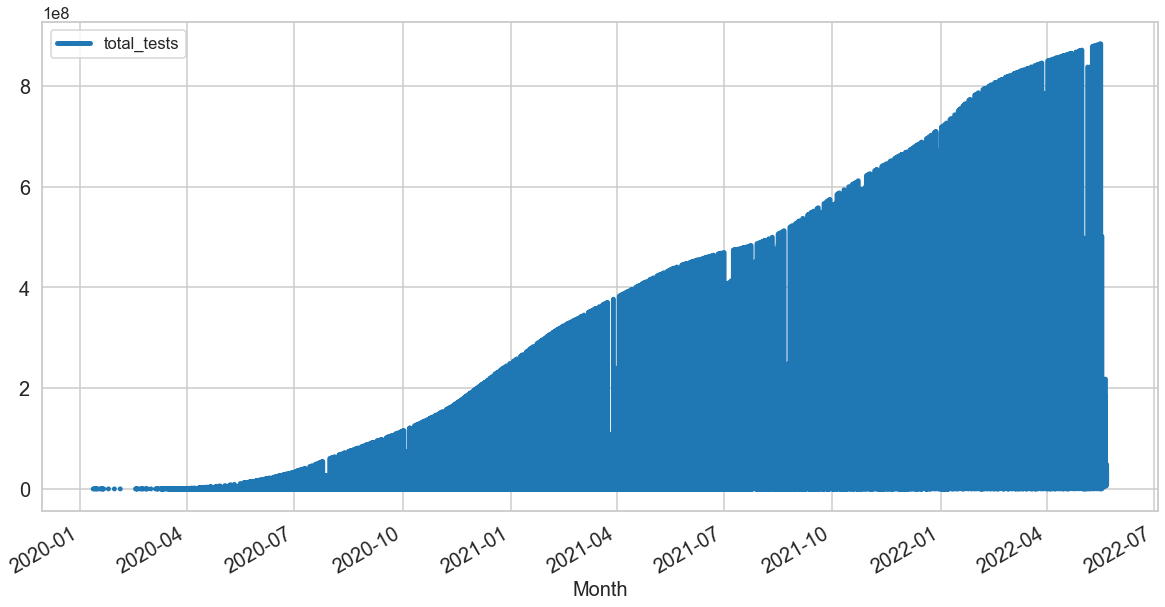

In [39]:
total_tests = df1[['total_tests']]
total_tests.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

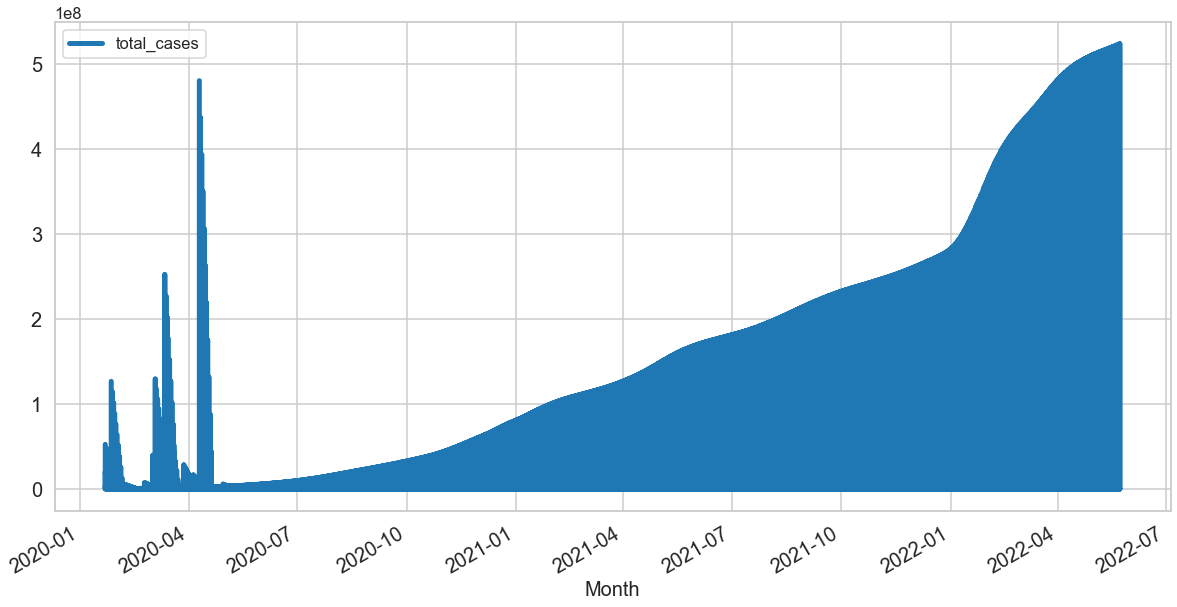

In [40]:
total_cases = df1[['total_cases']]
total_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

In [ ]:
Thank You